In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

# Cargar los Datos

In [2]:
df = pd.read_csv("http://www.forecastingbook.com/mooc/AustralianWines.csv?attredirects=0&d=1")
df.head()

,Month,Fortified,Red,Rose,sparkling,Sweet white,Dry white
0,Jan-80,2585,464,112,1686,85,1954
1,Feb-80,3368,675,118,1591,89,2302
2,Mar-80,3210,703,129,2304,109,3054
3,Apr-80,3111,887,99,1712,95,2414
4,May-80,3756,1139,116,1471,91,2226


In [3]:
fortified = df[['Month','Fortified']]
red = df[['Month','Red ']]
rose = df[['Month','Rose ']]
sparkling = df[['Month','sparkling ']]
sweet_white = df[['Month','Sweet white']]
dry_white = df[['Month','Dry white']]

In [4]:
print(fortified.isnull().sum(),
      red.isnull().sum(),
      rose.isnull().sum(),
      sparkling.isnull().sum(),
      sweet_white.isnull().sum(),
      dry_white.isnull().sum()
     )

Month        0
Fortified    0
dtype: int64 Month    0
Red      0
dtype: int64 Month    0
Rose     0
dtype: int64 Month         0
sparkling     0
dtype: int64 Month          0
Sweet white    0
dtype: int64 Month        0
Dry white    0
dtype: int64


# Fortified

In [5]:
fortified = fortified.groupby('Month')['Fortified'].sum().reset_index()

In [6]:
fortified['Month'] = pd.to_datetime(fortified['Month'])
fortified = fortified.set_index('Month')
fortified.index

DatetimeIndex(['1980-04-01', '1981-04-01', '1982-04-01', '1983-04-01',
               '1984-04-01', '1985-04-01', '1986-04-01', '1987-04-01',
               '1988-04-01', '1989-04-01',
               ...
               '1985-09-01', '1986-09-01', '1987-09-01', '1988-09-01',
               '1989-09-01', '1990-09-01', '1991-09-01', '1992-09-01',
               '1993-09-01', '1994-09-01'],
              dtype='datetime64[ns]', name='Month', length=180, freq=None)

In [7]:
y_fortified = fortified['Fortified'].resample('MS').mean()

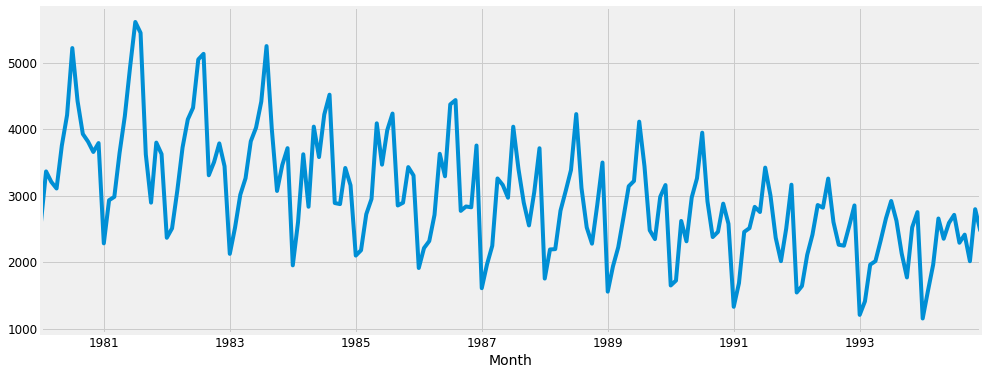

In [8]:
y_fortified.plot(figsize=(15, 6))
plt.show()

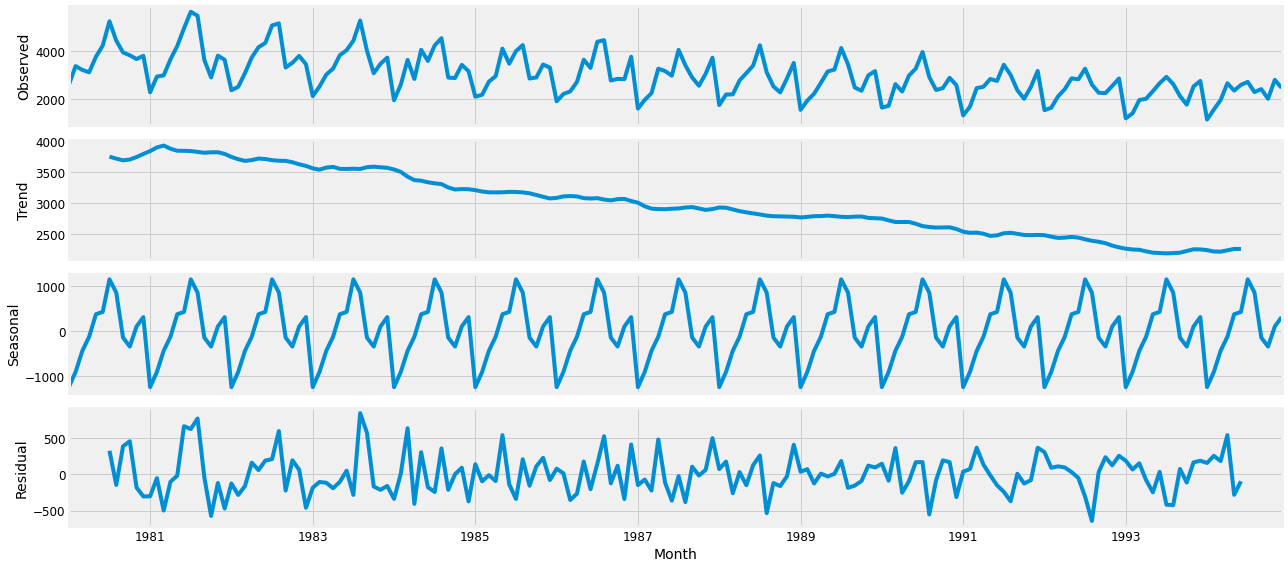

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_fortified, model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [12]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_fortified,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3390.855887693774
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2956.0083455899703
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2432.994551331798
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2237.6927808158725
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2426.932022994698
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2395.550517751053
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2250.20521002612
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2238.683908359949
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3248.812897902384
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2785.727743861335
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2412.0588752448048
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2215.7570889398376
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2425.0805095475216
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2382.386689502151
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2244.5059288973607
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2217.076379001858
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2854.593925201011
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2573.674471816187
ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2415.9529817408475
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2360.757533909417
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2203.7480882714653
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2169.0164995610994
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2870.2702197698463
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2587.716233378833
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2426.423840212329
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2229.8326179901323
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2411.4859044776595
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2393.4495993689343
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2229.4357622185526
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2230.9997507736166
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2851.2653354568124
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2547.818627818951
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2413.7403764516694
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2194.983693570127
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2407.005311432323


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2382.7777464964875
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2224.299712973551


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2181.4529110603917
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2854.0203048432004
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2569.9898381738694
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2466.4929180616728
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2239.9505491859572
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2455.222480194605
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2434.3059571234967
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2246.754072951845
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2241.248954243299
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2804.3946468563527
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2515.437519620553
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2393.4465010444674
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2171.3194424792437
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2401.5296146552273
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2361.9405662947847
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2189.7941609468526
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2170.863899954033


In [13]:
mod = sm.tsa.statespace.SARIMAX(y_fortified,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0351      0.081      0.435      0.663      -0.123       0.193
ma.L1         -1.0000      0.109     -9.149      0.000      -1.214      -0.786
ar.S.L12      -0.3522      0.060     -5.824      0.000      -0.471      -0.234
sigma2      8.075e+04   1.35e-06   5.97e+10      0.000    8.07e+04    8.07e+04


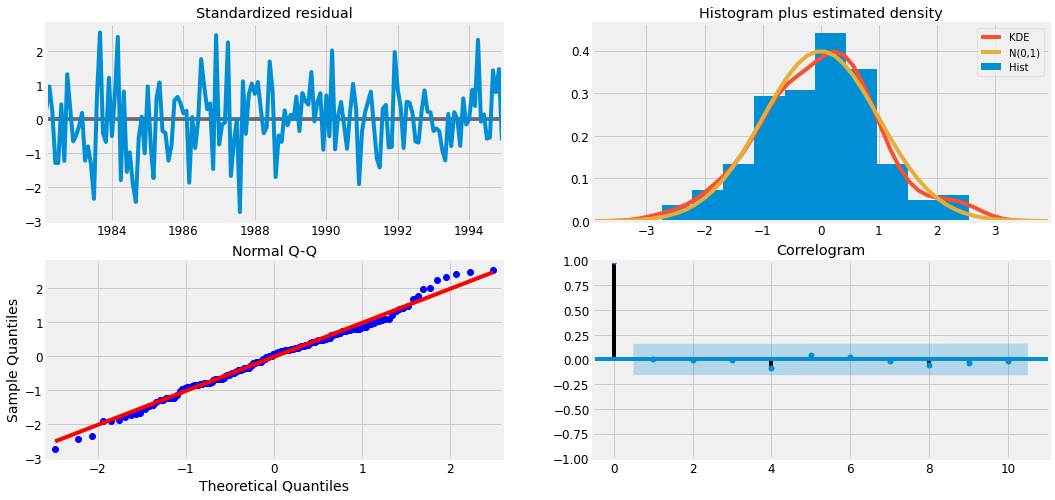

In [14]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

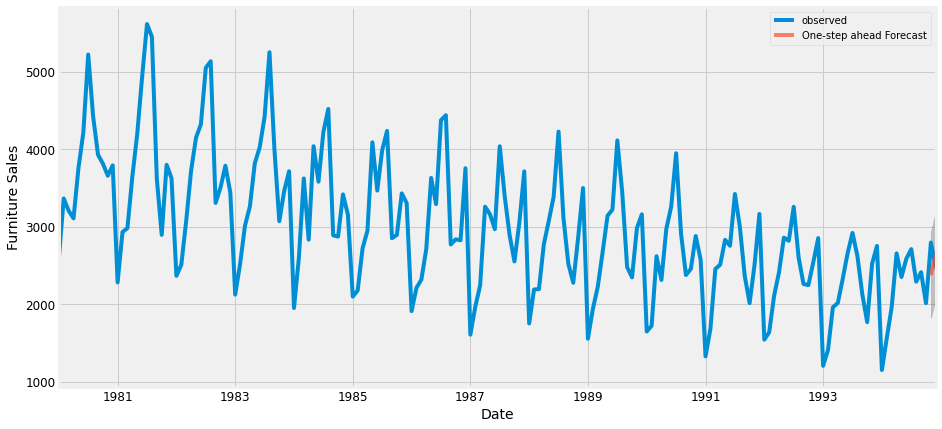

In [19]:
pred = results.get_prediction(start=pd.to_datetime('1994-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_fortified['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [21]:
y_forecasted = pred.predicted_mean
y_truth = y_fortified['1994-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 104327.99


In [22]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 323.0


# Red

In [23]:
red = red.groupby('Month')['Red '].sum().reset_index()

In [24]:
red['Month'] = pd.to_datetime(red['Month'])
red = red.set_index('Month')
red.index

DatetimeIndex(['1980-04-01', '1981-04-01', '1982-04-01', '1983-04-01',
               '1984-04-01', '1985-04-01', '1986-04-01', '1987-04-01',
               '1988-04-01', '1989-04-01',
               ...
               '1985-09-01', '1986-09-01', '1987-09-01', '1988-09-01',
               '1989-09-01', '1990-09-01', '1991-09-01', '1992-09-01',
               '1993-09-01', '1994-09-01'],
              dtype='datetime64[ns]', name='Month', length=180, freq=None)

In [25]:
y_red = red['Red '].resample('MS').mean()

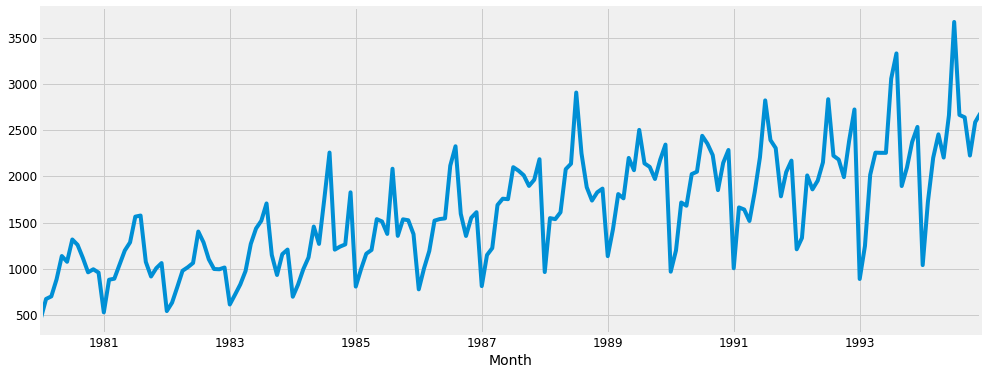

In [26]:
y_red.plot(figsize=(15, 6))
plt.show()

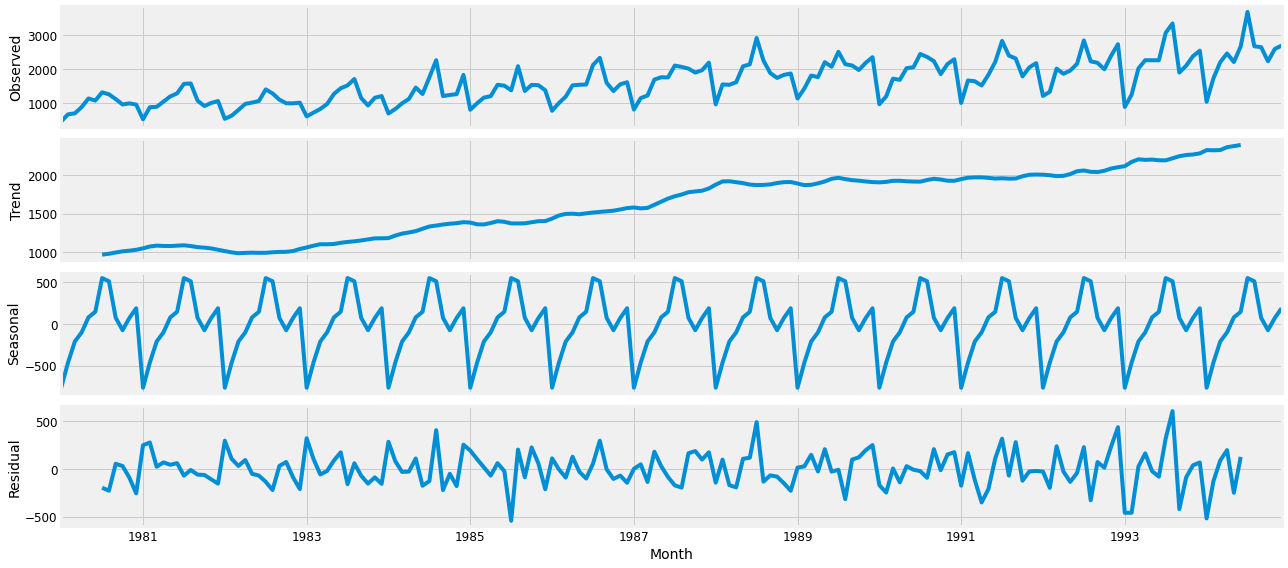

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y_red, model='additive')
fig = decomposition.plot()
plt.show()

In [28]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [29]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_red,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3182.4394373551067
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2793.4846472213
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2347.6994539011985
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2179.9400578369173
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2344.4306122064
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2283.4845326195473
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2189.9558182130304
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2178.6577789019075
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2982.048300927978
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2648.2283565171847
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2328.253786145532
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2155.9847043764357
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2344.2028478720467
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2268.0391087292146
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2178.936011719524
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2154.557046720536
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2679.4825185944637
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2447.2235892763406
AR

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2325.4630187204


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2252.524042795949
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2130.430575169698
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2101.8338446779053
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2671.958541104426
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2433.390062856096
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2367.3237380660676
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2149.9991979156257
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2359.6069588814207
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2305.5951798709066
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2156.151692392955
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2148.4933530601347
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2623.434292624682
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2382.6773206679877
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2301.848006084768
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2088.3704082196
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2311.434817088245
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2241.4240945559814
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2111.674457417581
ARIM

In [30]:
mod = sm.tsa.statespace.SARIMAX(y_red,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.092     -0.359      0.719      -0.214       0.148
ma.L1         -0.8641      0.051    -16.956      0.000      -0.964      -0.764
ar.S.L12      -0.5606      0.064     -8.702      0.000      -0.687      -0.434
sigma2      4.989e+04   4787.100     10.422      0.000    4.05e+04    5.93e+04


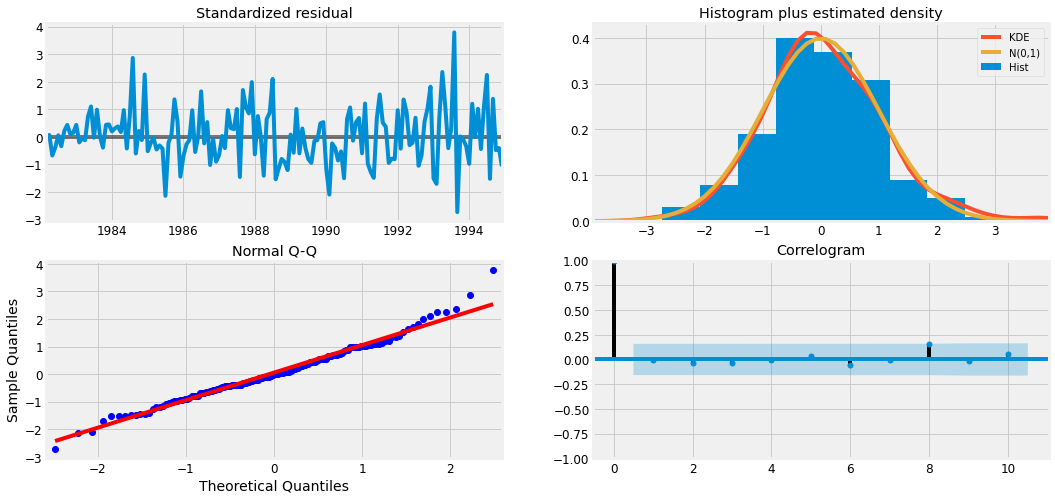

In [31]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

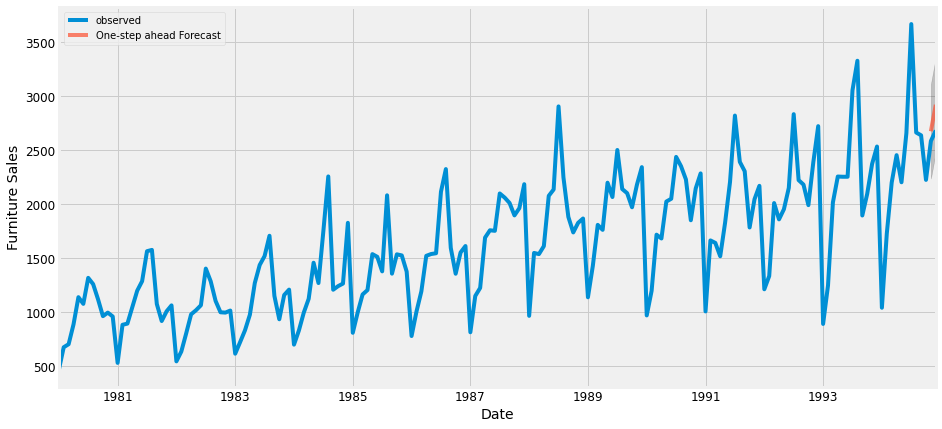

In [32]:
pred = results.get_prediction(start=pd.to_datetime('1994-11-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y_red['1980':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_truth = y_red['1994-11-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 32413.57


In [34]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 180.04


# Rose

In [ ]:
rose = rose.groupby('Month')['Rose '].sum().reset_index()

In [ ]:
rose['Month'] = pd.to_datetime(rose['Month'])
rose = rose.set_index('Month')
rose.index

In [ ]:
# nose porque no funciona con rose
#y_rose = rose['Rose '].resample('MS').mean()

In [ ]:
#y_rose.plot(figsize=(15, 6))
#plt.show()

# Sparkling

In [ ]:
sparkling = sparkling.groupby('Month')['sparkling '].sum().reset_index()

In [ ]:
sparkling['Month'] = pd.to_datetime(sparkling['Month'])
sparkling = sparkling.set_index('Month')
sparkling.index

In [ ]:
y_sparkling = sparkling['sparkling '].resample('MS').mean()

In [ ]:
y_sparkling.plot(figsize=(15, 6))
plt.show()

# Sweet white

In [ ]:
sweet_white = sweet_white.groupby('Month')['Sweet white'].sum().reset_index()

In [ ]:
sweet_white['Month'] = pd.to_datetime(sweet_white['Month'])
sweet_white = sweet_white.set_index('Month')
sweet_white.index

In [ ]:
y_sweet_white = sweet_white['Sweet white'].resample('MS').mean()

In [ ]:
y_sweet_white.plot(figsize=(15, 6))
plt.show()

# Dry white

In [ ]:
dry_white = dry_white.groupby('Month')['Dry white'].sum().reset_index()

In [ ]:
dry_white['Month'] = pd.to_datetime(dry_white['Month'])
dry_white = dry_white.set_index('Month')
dry_white.index

In [ ]:
y_dry_white = dry_white['Dry white'].resample('MS').mean()

In [ ]:
y_dry_white.plot(figsize=(15, 6))
plt.show()

# Ejemplo

In [ ]:
df = pd.read_excel("C:/Users/ascan/Downloads/Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [ ]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [ ]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [ ]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [ ]:
y = furniture['Sales'].resample('MS').mean()

In [ ]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

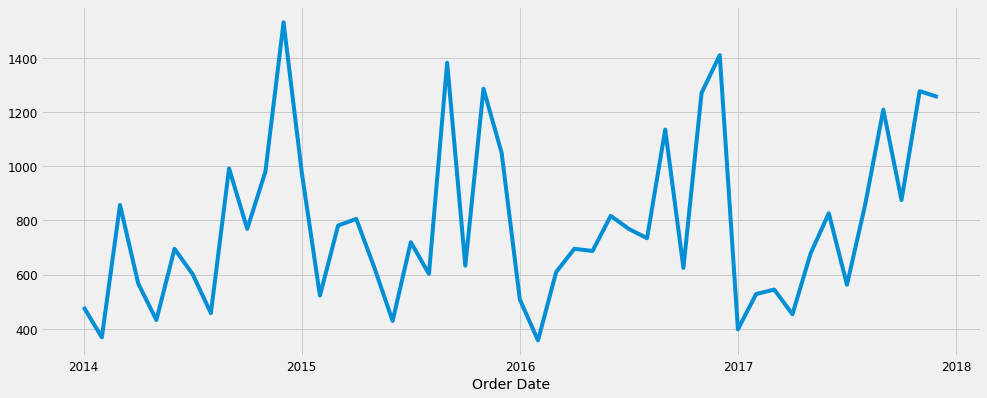

In [ ]:
y.plot(figsize=(15, 6))
plt.show()

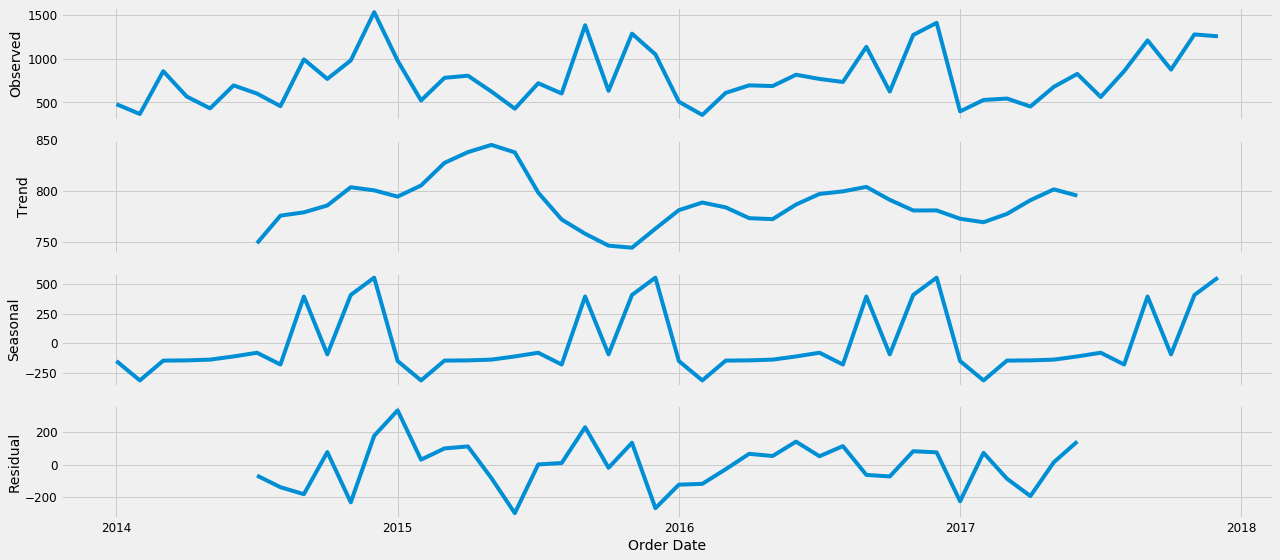

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205916
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1446.5593227130305
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130920218
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1172.208674145885
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2900.357535652858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091255
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.574045803366
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2513.1394870316744
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.98848769468657
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.894766843944
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1250.2320272227237
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.63785672282035
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.78896630044073
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1550.2003231687213
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:319.7714068109211
ARI

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


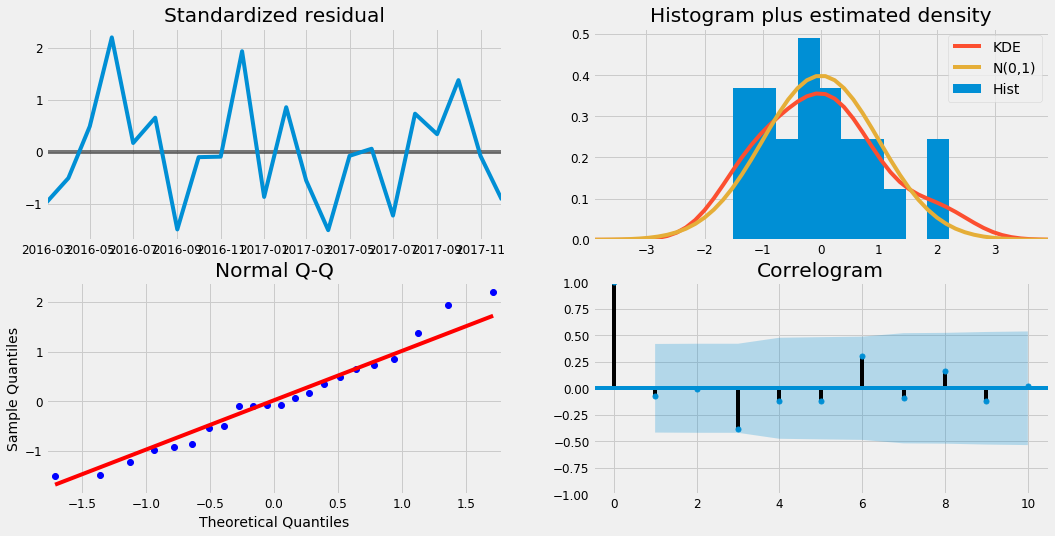

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

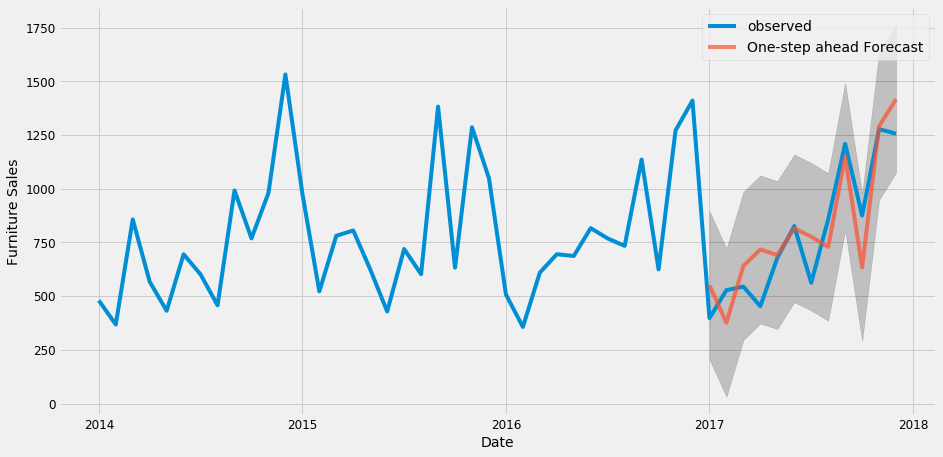

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22993.58


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64
